# Machine Learning workflow

## Import libraries

### all-time basics

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### machine learning specifics

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

## Import data

👇 Load the `WHO_ther_eff.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

This dataset includes data on --- and is kindly provided by the WHO through their data download [page](https://apps.who.int/malaria/maps/threats/#/download). 

In [14]:
df = pd.read_csv("../data/raw/WHO_ther_eff.csv")
df.head()

,ID,COUNTRY_NAME,ISO2,ADMIN2,SITE_NAME,LATITUDE,LONGITUDE,YEAR_START,YEAR_END,DRUG_NAME,PLASMODIUM_SPECIES,SAMPLE_SIZE,FOLLOW_UP (days),POSITIVE_DAY_3 (days),TREATMENT_FAILURE_PP,TREATMENT_FAILURE_KM,DATA_SOURCE,CITATION_URL
0,3,Cambodia,KH,Ratanakiri,Veun Sai,14.261043,106.794241,2010,2011,Artemether-lumefantrine,P. falciparum,60,28,3.2,5.0,4.9,"National Center for Parasitology, Entomology a...",NaN
1,15,Cambodia,KH,Pailin Province,Pailin,12.741784,102.633104,2011,2011,Artesunate-mefloquine,P. falciparum,28,42,51.7,0.0,0.0,"National Center for Parasitology, Entomology a...",NaN
2,23,Cambodia,KH,Pailin Province,Pailin,12.741784,102.633104,2010,2011,Dihydroartemisinin-piperaquine,P. falciparum,28,42,44.8,25.0,24.1,"National Center for Parasitology, Entomology a...",NaN
3,24,Cambodia,KH,Pursat,Veal Veng,12.546349,103.918749,2010,2010,Dihydroartemisinin-piperaquine,P. falciparum,56,42,10.2,10.7,10.5,"National Center for Parasitology, Entomology a...",NaN
4,25,Cambodia,KH,Ratanakiri,Veun Sai,14.261043,106.794241,2010,2010,Dihydroartemisinin-piperaquine,P. falciparum,59,42,0.0,0.0,0.0,"National Center for Parasitology, Entomology a...",NaN


Now do the same with the `WHO_int_conc.csv` dataset and save as a variable named `data`.

In [23]:
# type, uncomment and run your code here

<details><summary markdown='span'>View solution
</summary>

```python
df = pd.read_csv("../data/raw/WHO_int_conc.csv")
df.head()
```

</details>

This dataset includes data on --- and is kindly provided by the WHO through their data download [page](https://apps.who.int/malaria/maps/threats/#/download). 

## 0. Data Exploration and Visualisation

Python simplifies our work by providing core functions to explore our loaded panda dataframe.

👇 Run the function below to have a look at the shape of the dataset, which tells us the `(number of rows, number of columns)`.

In [31]:
df.shape

(468, 18)

The `df` dataset includes 468 columns and 18 columns.

👇 We can also peek at the first 5 rows:

In [34]:
df.head()

,ID,COUNTRY_NAME,ISO2,ADMIN2,SITE_NAME,LATITUDE,LONGITUDE,YEAR_START,YEAR_END,DRUG_NAME,PLASMODIUM_SPECIES,SAMPLE_SIZE,FOLLOW_UP (days),POSITIVE_DAY_3 (days),TREATMENT_FAILURE_PP,TREATMENT_FAILURE_KM,DATA_SOURCE,CITATION_URL
718,831,Viet Nam,VN,Binh Phuoc,Phuoc Long,11.833733,106.994895,2010,2011,Dihydroartemisinin-piperaquine,P. falciparum,51,42,22.0,0.0,0.0,"Oxford University Clinical Research Unit, Well...",http://www.ncbi.nlm.nih.gov/pubmed/23101492
726,932,India,IN,Andhra Pradesh,Vishakhapatnam,17.686816,83.218481,2010,2010,Artesunate+sulfadoxine-pyrimethamine,P. falciparum,52,28,0.0,0.0,0.0,"National Institute of Malaria Research, Indian...",http://www.ncbi.nlm.nih.gov/pubmed/23284195
727,933,India,IN,Chhattisgarh,Bilaspur,22.079625,82.139141,2010,2010,Artesunate+sulfadoxine-pyrimethamine,P. falciparum,67,28,0.0,0.0,0.0,"National Institute of Malaria Research, Indian...",http://www.ncbi.nlm.nih.gov/pubmed/23284195
728,934,India,IN,Jharkhand,Dumka,24.285466,87.241930,2010,2010,Artesunate+sulfadoxine-pyrimethamine,P. falciparum,56,28,5.3,0.0,0.0,"National Institute of Malaria Research, Indian...",http://www.ncbi.nlm.nih.gov/pubmed/23284195
729,935,India,IN,Jharkhand,Latehar,23.746322,84.509110,2010,2010,Artesunate+sulfadoxine-pyrimethamine,P. falciparum,70,28,0.0,0.0,0.0,"National Institute of Malaria Research, Indian...",http://www.ncbi.nlm.nih.gov/pubmed/23284195


👇 Run the function below to get a quick glance at the whole dataset. 

In [24]:
df.describe()

,ID,LATITUDE,LONGITUDE,YEAR_START,YEAR_END,SAMPLE_SIZE,FOLLOW_UP (days),POSITIVE_DAY_3 (days),TREATMENT_FAILURE_PP,TREATMENT_FAILURE_KM
count,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1099.000000,1539.000000,1311.000000
mean,6259.748062,9.264416,51.964234,2014.347545,2015.127261,64.946382,31.029716,5.297015,2.635510,2.097101
std,10290.433519,11.959622,48.848968,3.058894,2.977608,69.238085,5.767003,12.735953,7.365779,7.014991
min,3.000000,-25.392301,-77.266667,2010.000000,2010.000000,1.000000,28.000000,0.000000,0.000000,0.000000
25%,1108.750000,2.500000,12.032778,2012.000000,2013.000000,34.000000,28.000000,0.000000,0.000000,0.000000
50%,1586.500000,11.771389,38.916667,2014.000000,2015.000000,58.000000,28.000000,0.000000,0.000000,0.000000
75%,1984.250000,14.925213,98.552875,2017.000000,2017.000000,81.000000,28.000000,2.550000,2.400000,1.600000
max,50024.000000,39.797406,168.270395,2023.000000,2023.000000,1668.000000,42.000000,93.800000,100.000000,100.000000


👇 Run the function below to get a quick glance at a specific column. 

In [27]:
df["SAMPLE_SIZE"].describe()

count    1548.000000
mean       64.946382
std        69.238085
min         1.000000
25%        34.000000
50%        58.000000
75%        81.000000
max      1668.000000
Name: SAMPLE_SIZE, dtype: float64

❓How would you look at the details of the YEAR_START column?

In [26]:
# type, uncomment and run your code here

<details><summary markdown='span'>View solution
</summary>

```python
df["YEAR_START"].describe()
```

</details>

❓How many ---- are there in this dataset?

In [28]:
# df['TODO'].nunique()

❓How many observations for each category are there in the dataset?

In [29]:
# df['TODO'].value_counts()

A good practice is to plot the data to understand better the relationship between the different variables. 

👇 Run the function below to create a scatterplot.

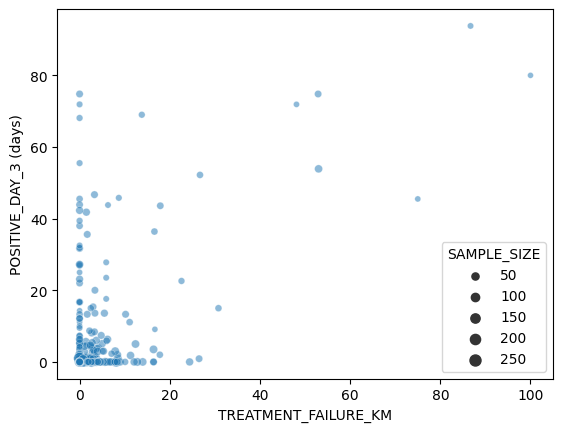

In [49]:
sns.scatterplot(x='TREATMENT_FAILURE_KM', y='POSITIVE_DAY_3 (days)', data=df, size='SAMPLE_SIZE', alpha=0.5);

In [ ]:
# Plot like a pro - let's see all the relationships between our columns
sns.pairplot(penguin_df, hue="species", corner = True);

## 1. Data cleaning

Before using the dataset, we need to make sure it is usable. 

👇 First, we clean all the NA (Non Applicable) values.

In [30]:
df.dropna(inplace=True)

👇 Then, we remove all duplicate values.

In [ ]:
df = df.drop_duplicates()

In real life, cleaning data includes a lot more steps and can get tricky.

Cleaning and preprocessing data can be the longest part of the process and can be considered the most important one. 

## 2. Train

Let's start the machine learning specifics.

### Choosing your model

We start with the easiest model of them all: the linear regression, imported at the beginning on the notebook from the [Scikit-Learn](https://scikit-learn.org) library. 

<details><summary markdown='span'>Additional info
</summary>

  Scikit-Learn is an open source, well documentted and honestly life saving initiative for all mahcine learning enthusiasts. 
  Do not hesitate to read their [documentation](https://scikit-learn.org/stable/user_guide.html) and explore their [tutorials](https://scikit-learn.org/stable/auto_examples/index.html). 

  A linear regression is a mathematical model that can be written as f(x) = ax + b
  where a is the slope and b is the intercept. 
</details>


In [50]:
model = LinearRegression()

The model is now loaded under the `model` variable as shown by the cell below:

In [51]:
model

LinearRegression()

### Defining the features and the target

In [17]:
X = df[['TBD']]
y = df[['TBD']]

plt.scatter(X, y, alpha = .2)

### Fitting your model

In [ ]:
model1 = model.fit(X, y)

<details>
<summary> Solution </summary>

</details>

## 2. Cross-Validation

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

## 3. Predict

## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

## 4. 